### Loading Libraries

In [27]:
import numpy as np
import os
from scipy.misc import imread, imresize
from imageio import imread
import matplotlib.pyplot as plt
import skimage.io
import skimage.transform
from skimage.transform import resize
import tensorflow as tf

%matplotlib inline  


In [2]:
print('TF Version : ', tf.__version__)
cwd = os.getcwd()
print('Current path : %s' % (cwd))

TF Version :  1.12.0
Current path : /home/ubuntu/git-repo/TF-Tutorial/Sources


In [11]:
def print_typeshape(img):
    print('Type is %s' % (type(img)))
    print('Shape is %s' % (img.shape,))

### Loading Sample images

Type is <class 'imageio.core.util.Image'>
Shape is (525, 788, 3)


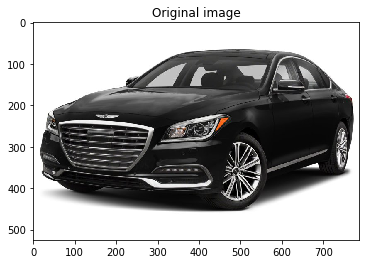

In [13]:
img = imread('../Data/Img/G80.jpg')
print_typeshape(img)

# Plotting
plt.figure(0)
plt.imshow(img)
plt.title('Original image')
plt.draw()


- imshow를 .astype(float)을 하면 값이 소수점으로 변환됨.
- 그런데 소수점인 경우 imshow function은 값을 0~1 사이의 값으로 간주함.
- 만일 위와 같이 float으로 하고자 한다면 /255.0 를 해줘야 함(0~1 내에서 크기를 제한하는 방향으로!)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Type is <class 'imageio.core.util.Image'>
Shape is (525, 788, 3)


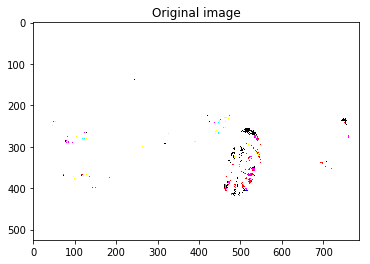

In [18]:
# Load
img2 = imread('../Data/Img/G80.jpg').astype(np.float)
print_typeshape(img2)

# Plotting
plt.figure(0)
plt.imshow(img2)
plt.title('Original image')
plt.draw()

Type is <class 'imageio.core.util.Image'>
Shape is (525, 788, 3)


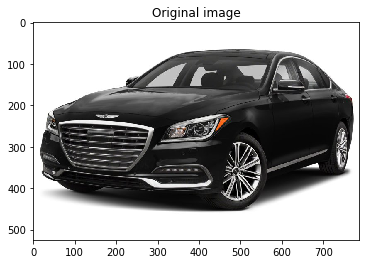

In [20]:
# Load
img3 = imread('../Data/Img/G80.jpg').astype(np.float)
print_typeshape(img3)

# Plotting
plt.figure(0)
plt.imshow(img3/255.) # 0~1 사이로 값을 변환하기 위함!(RGB의 최대값으로 나눠서 normalization)
plt.title('Original image')
plt.draw()

### Resizing

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Type is <class 'numpy.ndarray'>
Shape is (100, 200, 3)


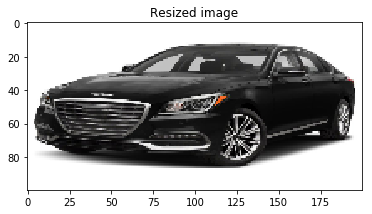

In [28]:
img_resized = resize(img, [100, 200, 3])
print_typeshape(img_resized)

# Plotting
plt.figure(0)
plt.imshow(img_resized) # 0~1 사이로 값을 변환하기 위함!(RGB의 최대값으로 나눠서 normalization)
plt.title('Resized image')
plt.draw()

### Grayscale

Type is <class 'imageio.core.util.Image'>
Shape is (525, 788, 3)
Type is <class 'imageio.core.util.Image'>
Shape is (525, 788)


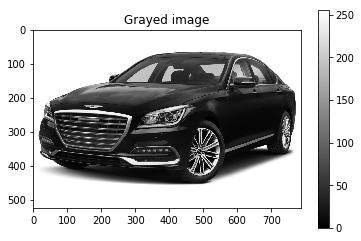

In [41]:

def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[:,:,:3], [0.299, 0.587, 0.114])
    else:
        print('Current Image if Gray!')
        return rgb

img_gray = rgb2gray(img)
print_typeshape(img)
print_typeshape(img_gray)

# Plotting
plt.figure(0)
plt.imshow(img_gray, cmap=plt.get_cmap('gray')) # 0~1 사이로 값을 변환하기 위함!(RGB의 최대값으로 나눠서 normalization)
plt.title('Grayed image')
plt.colorbar()
plt.draw()

In [36]:
#print(img_resized[...,:3])
print_typeshape(img_resized[...,:3])
print_typeshape(img_resized[:,:,:3])

Type is <class 'numpy.ndarray'>
Shape is (100, 200, 3)
Type is <class 'numpy.ndarray'>
Shape is (100, 200, 3)


### Reshape

Type is <class 'imageio.core.util.Image'>
Shape is (525, 788)


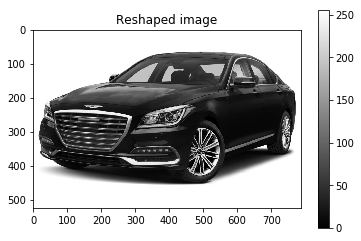

In [46]:
# Matrix to vector
img_rowvec = np.reshape(img_gray, (1,-1))

# Vector to Matrix
img_mat = np.reshape(img_rowvec, (525, -1))
print_typeshape(img_mat)

plt.imshow(img_gray, cmap=plt.get_cmap('gray')) # 0~1 사이로 값을 변환하기 위함!(RGB의 최대값으로 나눠서 normalization)
plt.title('Reshaped image')
plt.colorbar()
plt.draw()

### Load from folder

In [53]:
valid_exts = ['.jpg', '.gif', '.png', '.jpeg']
img_path = '../Data/Img/'

print('%d files are in %s' %(len(os.listdir(img_path)), img_path))

# Append images and their names
imgs = []
names = []

for f in os.listdir(img_path):
    ext = os.path.splitext(f)[1]
    
    if ext.lower() not in valid_exts:
        continue
    fullpath = os.path.join(img_path, f)
    imgs.append(imread(fullpath))
    names.append(os.path.splitext(f)[0] + os.path.splitext(f)[1])

print('%d images loaded' %(len(imgs)))


4 files are in ../Data/Img/
3 images loaded


In [57]:
# Check
nimgs = len(imgs)
randidx = np.sort(np.random.randint(nimgs, size=3))
print ("Type of 'imgs': ", type(imgs))
print ("Length of 'imgs': ", len(imgs))
for curr_img, curr_name, i \
    in zip([imgs[j] for j in randidx]
           , [names[j] for j in randidx]
           , range(len(randidx))):
    print ("[%d] Type of 'curr_img': %s" % (i, type(curr_img)))
    print ("    Name is: %s" % (curr_name))
    print ("    Size of 'curr_img': %s" % (curr_img.shape,))

Type of 'imgs':  <class 'list'>
Length of 'imgs':  3
[0] Type of 'curr_img': <class 'imageio.core.util.Image'>
    Name is: G70.jpg
    Size of 'curr_img': (675, 1200, 3)
[1] Type of 'curr_img': <class 'imageio.core.util.Image'>
    Name is: G80.jpg
    Size of 'curr_img': (525, 788, 3)
[2] Type of 'curr_img': <class 'imageio.core.util.Image'>
    Name is: G80.jpg
    Size of 'curr_img': (525, 788, 3)


In [ ]:
# Plot Images in 'imgs' list
nimgs = len(imgs)
randidx = np.sort(np.random.randint(nimgs, size=3))
for curr_img, curr_name, i \
    in zip([imgs[j] for j in randidx]
           , [names[j] for j in randidx], range(len(randidx))):
    plt.figure(i)
    plt.imshow(curr_img)
    plt.title("[" + str(i) + "] ")
    plt.draw()